In [1]:
# importing libraries and dependancies: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = pd.read_csv('sport_comments.csv',error_bad_lines=False
                       
                        
                        ,  encoding='latin1'
                       )


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ismayiltahmazov/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Here after importing the libraries I'll explore the data to the see the various datatypes and drop rows with missing values (if any)

In [2]:
data.head()

,video_id,comment,Unnamed: 2
0,3TJP5a3pBME,"thank you popsugar fitness, I love this! I nev...",NaN
1,3TJP5a3pBME,"Loved the workout, I sweat buckets! Just one ...",NaN
2,3TJP5a3pBME,Do not overestimate the 20 minutes! They are s...,NaN
3,3TJP5a3pBME,Phew - feeling the impact Ladies! Good job! ????,NaN
4,3TJP5a3pBME,This was the worst popsugar fitnessworkout eve...,NaN


In [3]:
data.shape

(10560, 3)

In [4]:
data = data.dropna()

In [5]:
data.shape

(11, 3)

Since only a few rows (18) had missing data, I found it better to drop those and work on the remaining data

In [6]:
data.dtypes

video_id      object
comment       object
Unnamed: 2    object
dtype: object

In [7]:
data['comment'].head()

754                                                 9:50 
913     Now if we all could be great at being kind to ...
953                                             RIP Kobe 
954                             Just one thing is missing
1262    3:43 finally an american who can kick a footba...
Name: comment, dtype: object

In [8]:
# calling the function
sia = SentimentIntensityAnalyzer()

In [9]:
data['negative'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['neg'])
data['neutral'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['neu'])
data['positive'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['pos'])
data['compound'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['compound'])

In [10]:
data.head()

,video_id,comment,Unnamed: 2,negative,neutral,positive,compound
754,kE7D7qFayVg,9:50,(,0.000,1.000,0.000,0.0000
913,kE7D7qFayVg,Now if we all could be great at being kind to ...,that would truly be great!,0.000,0.595,0.405,0.8176
953,kE7D7qFayVg,RIP Kobe,(,0.000,1.000,0.000,0.0000
954,kE7D7qFayVg,Just one thing is missing,AGUEROOOOOOOOO!,0.355,0.645,0.000,-0.2960
1262,-RmUADCWI4A,3:43 finally an american who can kick a footba...,),0.000,1.000,0.000,0.0000


## Finding the percentage of positive, negative and neutral reviews : 

Reviews with less than -0.4 sentiment are taken as negative reviews. Sentiment of polarity greater than 0.4 is positive and anything in between -0.4 and 0.4 is neutral sentiment.

In [11]:
# Counting the positive, negative and neutral reviews : 

positive_reviews = np.sum(i > 0.4 for i in data['compound'])
neutral_reviews = np.sum(-0.4 < i < 0.4 for i in data['compound'])
negative_reviews = np.sum(i < -0.4 for i in data['compound'])
n = len(data['compound'])

/Users/ismayiltahmazov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ismayiltahmazov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.
/Users/ismayiltahmazov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


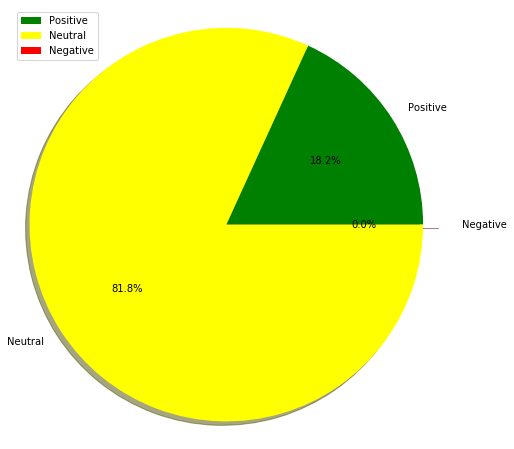

In [12]:

labels = 'Positive', 'Neutral', 'Negative'
sizes = [(positive_reviews * 100)/n, (neutral_reviews * 100)/n, (negative_reviews * 100)/n]
colors = ['green', 'yellow', 'red']
explode = (0, 0, 0.1)  # explode 1st slice

# Plot
plt.figure(figsize =(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.axis('equal') 
plt.legend()
plt.show()

In [13]:
from wordcloud import WordCloud, STOPWORDS

In [14]:
stopwords = set(STOPWORDS)
text = " ".join(i for i in data['comment'])

In [15]:
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 306 words in the combination of all reviews.


In [16]:
# Generating a wordcloud image: 
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=100).generate(text)

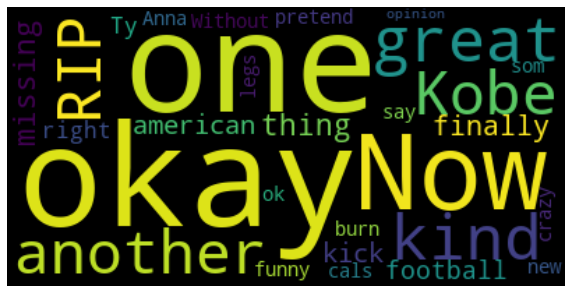

In [17]:
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()